# Setup

In [1]:
BATCH_SIZE = 7

In [2]:
from dataset import augmented_batch, CustomImageFolder, CustomTensorDataset 
import torch
from torch.utils.data import Dataset, DataLoader

In [17]:
def show_pairs_in_batch(dataloader: DataLoader):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(BATCH_SIZE, 2, figsize=(14, 14))

    batch = next(iter(dataloader))
    titles = ['Image 1', 'Augmented']

    for image_idx, image in enumerate(batch):
        batch_idx, pair_idx = image_idx // 2, image_idx % 2
        axs[batch_idx, pair_idx].imshow(torch.permute(image, (1,2,0)))
        axs[batch_idx, pair_idx].set_title(titles[pair_idx])
    
    fig.suptitle(f'Batch of {BATCH_SIZE} Pairs')
    plt.show()

# CelebA

In [13]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(), ])

train_kwargs = {'root': "./data/CelebA", 'transform': transform}
celeba_data = CustomImageFolder(**train_kwargs)

In [14]:
len(celeba_data)

202599

In [15]:
celeba_dataloader = DataLoader(celeba_data, batch_size=BATCH_SIZE, 
                               collate_fn=augmented_batch, shuffle=True)

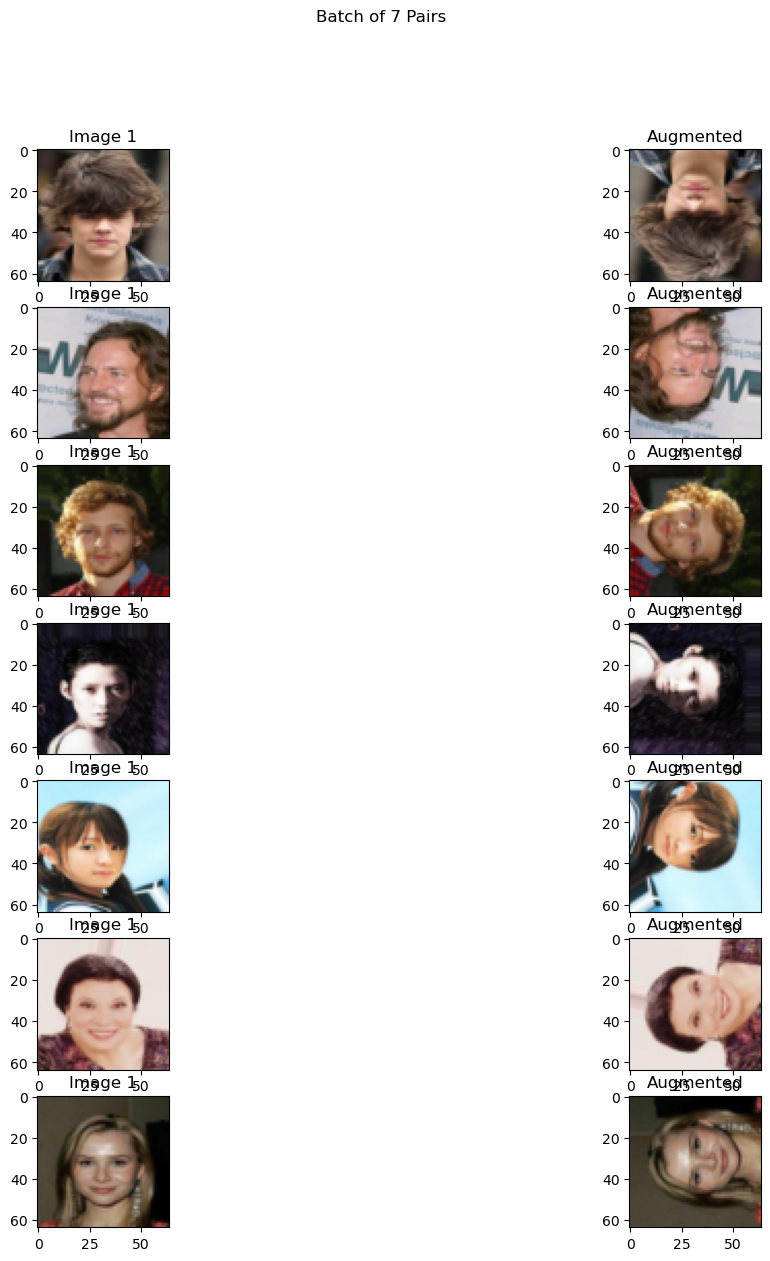

In [18]:
show_pairs_in_batch(celeba_dataloader)

# 3DChairs

In [9]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(), ])

train_kwargs = {'root': "./data/3DChairs", 'transform': transform}
chairs3D_data = CustomImageFolder(**train_kwargs)

In [10]:
chairs3D_dataloader = DataLoader(chairs3D_data, batch_size=BATCH_SIZE, 
                                 collate_fn=augmented_batch, shuffle=True)

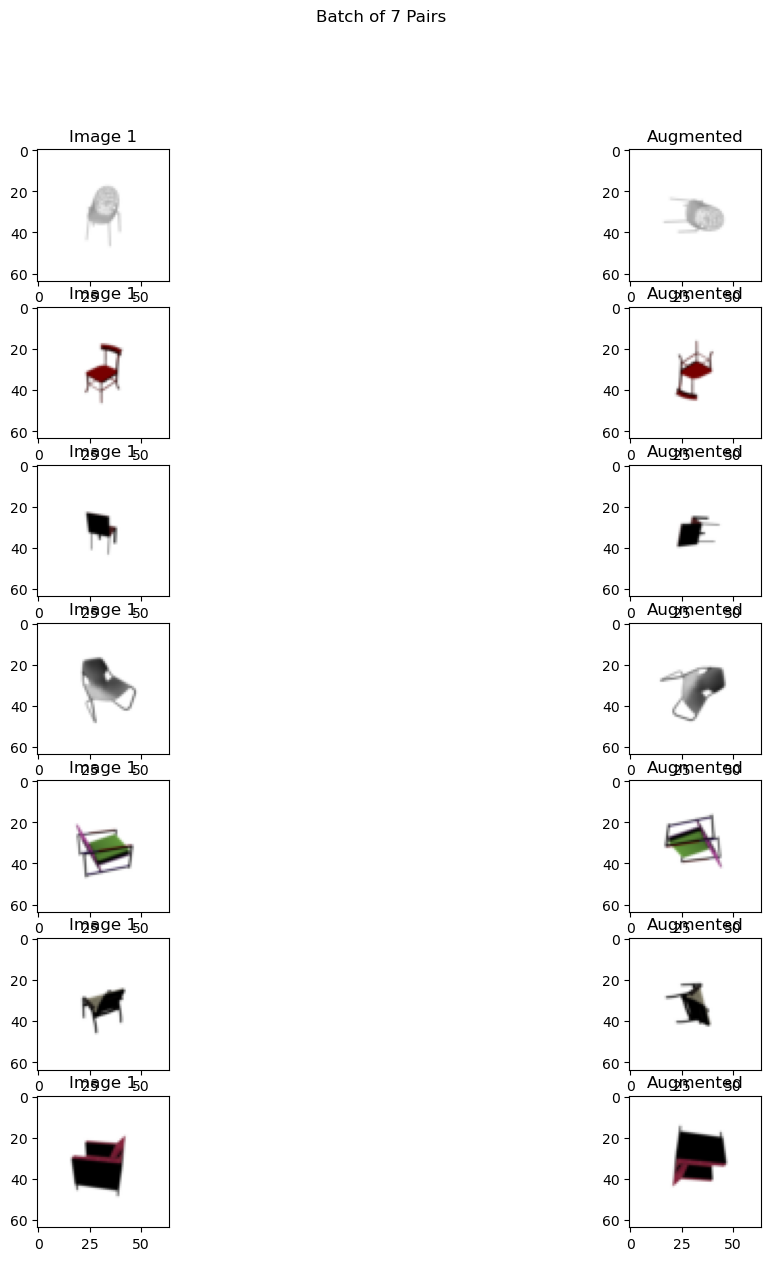

In [19]:
show_pairs_in_batch(chairs3D_dataloader)

# dSprites

In [20]:
import numpy as np
dSprites_data = np.load("./data/dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz", encoding='bytes')
dSprites_data = torch.from_numpy(dSprites_data['imgs']).unsqueeze(1).float()

In [21]:
dSprites_dataset = CustomTensorDataset(data_tensor = dSprites_data)
dSprites_dataloader = DataLoader(dSprites_dataset, batch_size=BATCH_SIZE, 
                                 collate_fn=augmented_batch, shuffle=True)

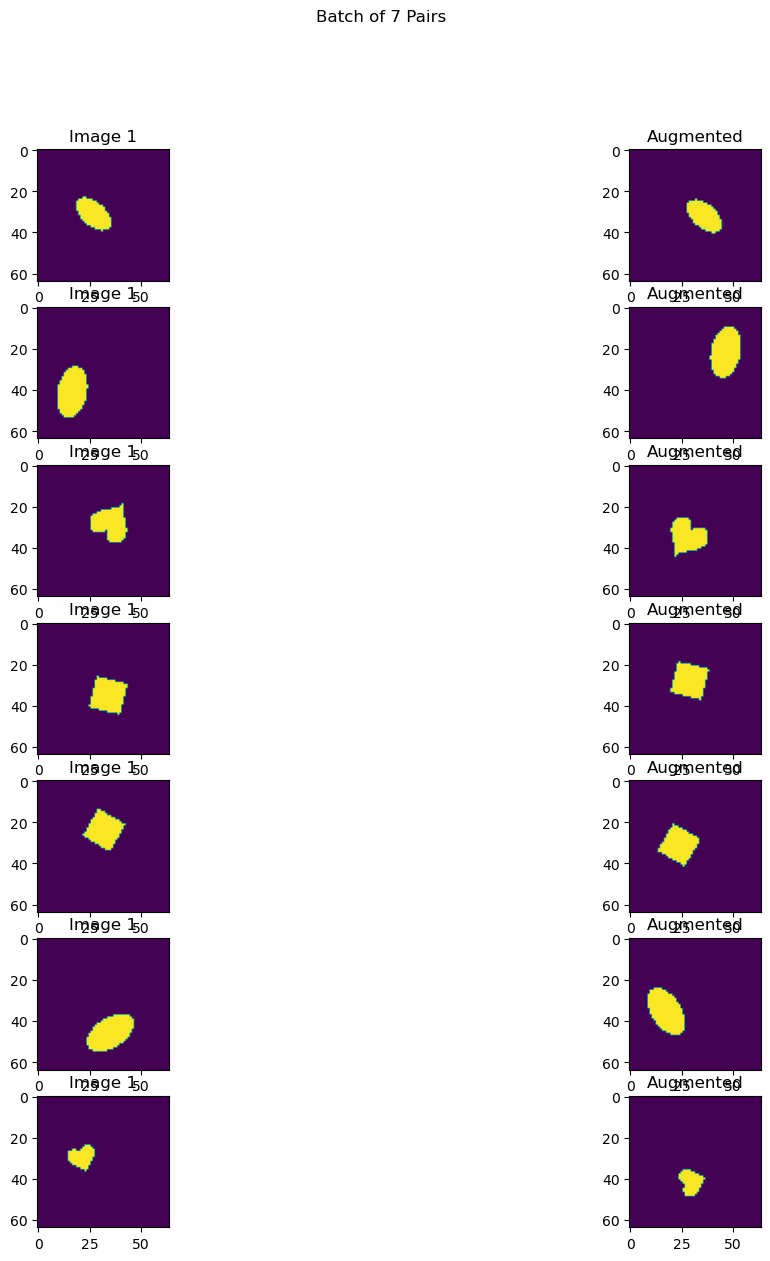

In [22]:
show_pairs_in_batch(dSprites_dataloader)